In [16]:
import numpy as np

a = []
angle = 3.2
a.append(angle)
a.append(angle)
a

[3.2, 3.2]

In [5]:
import cv2 
import mediapipe as mp
import numpy as np

filename = "./videos/RayAllen2.mp4"
time = 0
times = []

cap = cv2.VideoCapture(filename)
cap.set(cv2.CAP_PROP_FPS, 60)

while cap.isOpened():      
       
    ret, frame = cap.read()  
    if not ret:
        cap.release()
        break     
    times.append(time)
    time+=1
    
cap.release()
cv2.destroyAllWindows()    
print(f"filename: {len(times)}")


filename: 76


stopped bouncing at t=7.762



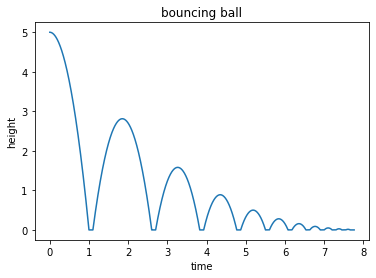

In [1]:
from math import sqrt
import matplotlib.pyplot as plt

h0 = 5         # m/s
v = 0          # m/s, current velocity
g = 10         # m/s/s
t = 0          # starting time
dt = 0.001     # time step
rho = 0.75     # coefficient of restitution
tau = 0.10     # contact time for bounce
hmax = h0      # keep track of the maximum height
h = h0
hstop = 0.01   # stop when bounce is less than 1 cm
freefall = True # state: freefall or in contact
t_last = -sqrt(2*h0/g) # time we would have launched to get to h0 at t=0
vmax = sqrt(2 * hmax * g)
H = []
T = []
while(hmax > hstop):
  if(freefall):
    hnew = h + v*dt - 0.5*g*dt*dt
    if(hnew<0):
      t = t_last + 2*sqrt(2*hmax/g)
      freefall = False
      t_last = t + tau
      h = 0
    else:
      t = t + dt
      v = v - g*dt
      h = hnew
  else:
    t = t + tau
    vmax = vmax * rho
    v = vmax
    freefall = True
    h = 0
  hmax = 0.5*vmax*vmax/g
  H.append(h)
  T.append(t)

plt.figure()
plt.plot(T, H)
plt.xlabel('time')
plt.ylabel('height')
plt.title('bouncing ball')

print("stopped bouncing at t=%.3f\n"%(t))
